# Exploring Dandiset 001174: Calcium Imaging in SMA and M1 of Macaques

**⚠️ DISCLAIMER: This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results. ⚠️**

## Overview

This notebook explores Dandiset 001174 (version 0.250331.2218), which contains calcium imaging data recorded from supplementary motor area (SMA) and primary motor (M1) cortices in rhesus macaques. The researchers used miniature microscopes and calcium imaging to study the activity patterns of projection neurons in deep layers of these motor areas while the animals were either at rest or engaged in an arm reaching task.

You can access the dataset at: [https://dandiarchive.org/dandiset/001174/0.250331.2218](https://dandiarchive.org/dandiset/001174/0.250331.2218)

In this notebook, we will:
1. Connect to the DANDI archive and get basic information about the dataset
2. Explore the structure of an NWB (Neurodata Without Borders) file from this dataset
3. Load and visualize calcium imaging data, including:
   - Raw imaging frames
   - Region of interest (ROI) masks
   - Calcium fluorescence traces
   - Event amplitudes for identified neurons
4. Analyze the relationship between different neurons' activity patterns

## Required Packages

The following packages are required to run this notebook. We assume these are already installed on your system.

In [1]:
# Standard libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from itertools import islice

# Specialized libraries for neurophysiology data
import h5py
import remfile
import pynwb
from dandi.dandiapi import DandiAPIClient

# Set plot styling
sns.set_theme()

## Connecting to the DANDI Archive

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001174", "0.250331.2218")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description'][:300]}...")  # Show first 300 chars of description
print(f"\nKeywords: {', '.join(metadata.get('keywords', []))}")
print(f"\nMeasurement techniques: {', '.join([t.get('name', '') for t in metadata.get('measurementTechnique', [])])}")

Dandiset name: Calcium imaging in SMA and M1 of macaques
Dandiset URL: https://dandiarchive.org/dandiset/001174/0.250331.2218
Description: The study of motor cortices in non-human primates is relevant to our understanding of human motor control, both in healthy conditions and in movement disorders. Calcium imaging and miniature microscopes allow the study of multiple genetically identified neurons with excellent spatial resolution. We ...

Keywords: One-photon calcium imaging, non-human primates, microendoscope, reaching task, neuronal coactivation, calcium sensors, GCaMP, GRIN lens

Measurement techniques: 


## Exploring the Assets in the Dandiset

Let's list some assets in the Dandiset to get a sense of what's available.

In [3]:
# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")


First 5 assets:
- sub-V/sub-V_ses-20230309T110929_ophys.nwb (ID: a2b04c7f-f671-4a55-ac36-5df4d842dfc2)
- sub-Q/sub-Q_ophys.nwb (ID: de07db56-e7f3-4809-9972-755c51598e8d)
- sub-Q/sub-Q_ses-20220922T131747_ophys.nwb (ID: ac161d0e-7642-48bd-9bef-8eff59319d48)
- sub-Q/sub-Q_ses-20221003T131952_ophys.nwb (ID: 9c3678d5-22c3-402c-8cd4-6bc38c4d61e3)
- sub-Q/sub-Q_ses-20221028T121142_ophys.nwb (ID: b4e6bbf7-0564-4628-b8f0-680fd9b8d4ea)


## Loading and Exploring an NWB File

For this exploration, we'll focus on a single NWB file from subject Q, which contains calcium imaging data recorded from the supplementary motor area (SMA) during a spontaneous condition.

We'll use the file: `sub-Q/sub-Q_ophys.nwb` with asset ID: `de07db56-e7f3-4809-9972-755c51598e8d`

In [4]:
# File URL constructed from the asset ID
url = "https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/"
print(f"Loading NWB file from URL: {url}")

# Create a remote file object and load the NWB file
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

Loading NWB file from URL: https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/


## Basic Information about the NWB File

In [5]:
# Print basic information about the NWB file
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"File creation date: {nwb.file_create_date[0]}")

# Subject information
print("\nSubject information:")
print(f"  Subject ID: {nwb.subject.subject_id}")
print(f"  Species: {nwb.subject.species}")
print(f"  Sex: {nwb.subject.sex}")
print(f"  Age: {nwb.subject.age}")

Session description: Calcium imaging in SMA during the spontaneous condition
Session start time: 2022-09-15 13:16:33.129000+00:00
File creation date: 2025-01-23 15:39:28.539904+00:00

Subject information:
  Subject ID: Q
  Species: Macaca mulatta
  Sex: F
  Age: P5Y


## NWB File Structure

This NWB file contains several key components:

1. **Acquisition**
   - `OnePhotonSeries`: Raw calcium imaging data, with dimensions (frames, height, width)

2. **Processing**
   - `ophys` processing module containing:
     - `ImageSegmentation`: Contains ROI masks for identified neurons
     - `Fluorescence`: Calcium fluorescence traces for each ROI
     - `EventAmplitude`: Detected calcium events for each ROI

3. **Device information**
   - Information about the microscope used (NVista3 from Inscopix)
   
Let's explore each of these components.

## Device Information

In [6]:
# Get information about the imaging device
device = nwb.devices["Miniscope"]
print(f"Microscope: {device.description} from {device.manufacturer}")

# Get information about the imaging plane
imaging_plane = nwb.imaging_planes["ImagingPlane"]
print(f"Excitation wavelength: {imaging_plane.excitation_lambda} nm")
print(f"Imaging rate: {imaging_plane.imaging_rate} Hz")

Microscope: NVista3 from Inscopix, Inc.
Excitation wavelength: 475.0 nm
Imaging rate: 10.01 Hz


## Raw Calcium Imaging Data

Let's examine the raw one-photon calcium imaging data. This dataset can be quite large, so we'll examine its properties and then visualize a sample frame.

In [7]:
# Get the OnePhotonSeries from the acquisition group
one_photon_series = nwb.acquisition["OnePhotonSeries"]

# Print information about the imaging data
print(f"Data shape: {one_photon_series.data.shape} (frames, height, width)")
print(f"Data type: {one_photon_series.data.dtype}")
print(f"Frame rate: {one_photon_series.rate} Hz")
print(f"Unit: {one_photon_series.unit}")
print(f"Description: {one_photon_series.description}")

# Calculate the total duration of the recording
total_frames = one_photon_series.data.shape[0]
duration_seconds = total_frames / one_photon_series.rate
print(f"\nTotal recording duration: {duration_seconds:.2f} seconds ({duration_seconds/60:.2f} minutes)")

Data shape: (6041, 320, 200) (frames, height, width)
Data type: uint16
Frame rate: 10.01 Hz
Unit: fluorescence
Description: Miniscope imaging data

Total recording duration: 603.50 seconds (10.06 minutes)


## Visualizing a Sample Frame

Let's visualize a sample frame from the raw imaging data to understand what we're looking at. We'll turn off the Seaborn styling for image display.

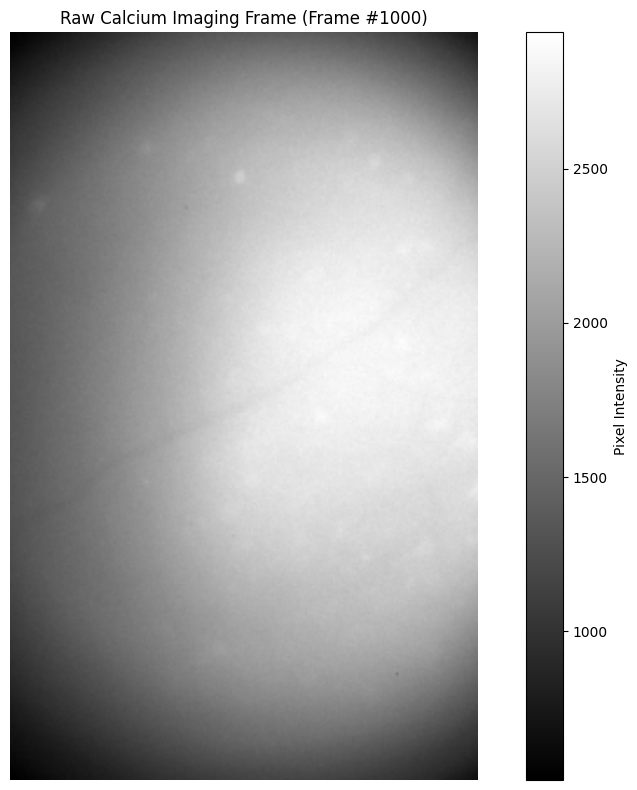

In [8]:
# Temporarily disable seaborn styling for better image display
with plt.style.context('default'):
    # Get a sample frame (frame 1000)
    sample_frame_idx = 1000
    sample_frame = one_photon_series.data[sample_frame_idx, :, :].astype(np.float32)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(sample_frame, cmap='gray')
    plt.colorbar(label='Pixel Intensity')
    plt.title(f'Raw Calcium Imaging Frame (Frame #{sample_frame_idx})')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

## Exploring ROIs (Regions of Interest)

Let's examine the ROIs that were extracted from the calcium imaging data. ROIs represent individual neurons identified in the field of view.

In [9]:
# Get the image segmentation data which contains ROI information
plane_seg = nwb.processing["ophys"].data_interfaces["ImageSegmentation"].plane_segmentations["PlaneSegmentation"]

# Get basic information about the ROIs
n_rois = len(plane_seg.id.data)
print(f"Number of ROIs (neurons): {n_rois}")

# Create a mask to visualize all ROIs
roi_masks = []

# Retrieve the first 5 ROI masks to understand their structure
print("\nSample ROI mask properties:")
for i in range(min(5, n_rois)):
    roi_mask = plane_seg.image_mask[i]
    mask_shape = (0, 0)
    if roi_mask.ndim == 1:  # Sparse representation
        # Check if the mask is a sparse representation (list of [x, y, intensity] triplets)
        # This is just informational - later we'll properly reshape for visualization
        print(f"  ROI #{i}: Sparse format, {len(roi_mask)//3} points")
    else:
        mask_shape = roi_mask.shape
        print(f"  ROI #{i}: Dense format, shape {mask_shape}")
    roi_masks.append(roi_mask)

Number of ROIs (neurons): 40

Sample ROI mask properties:


  ROI #0: Dense format, shape (292, 179)
  ROI #1: Dense format, shape (292, 179)
  ROI #2: Dense format, shape (292, 179)


  ROI #3: Dense format, shape (292, 179)
  ROI #4: Dense format, shape (292, 179)


To visualize the ROI masks, we first need to understand their format. Let's check the format and convert them an appropriate representation for visualization.

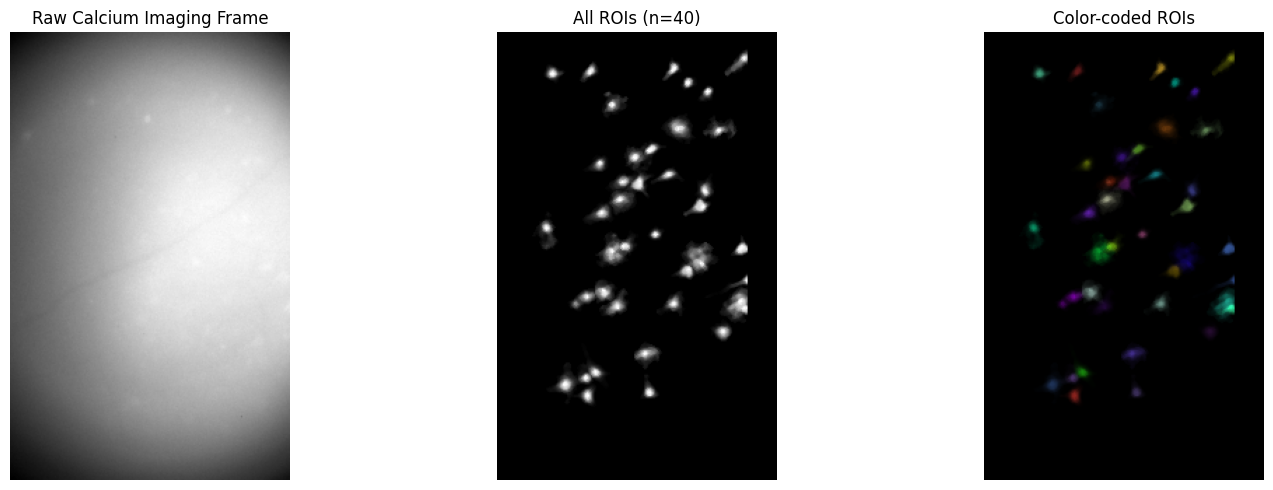

In [10]:
# Determine if masks are stored in sparse or dense format
sample_mask = plane_seg.image_mask[0]

# Convert and generate a visualization of all ROIs
with plt.style.context('default'):
    # Get the image dimensions from the raw data
    height, width = one_photon_series.data.shape[1], one_photon_series.data.shape[2]
    all_rois = np.zeros((height, width))
    
    # Create a colorful visualization of all ROIs
    roi_overlay = np.zeros((height, width, 3))
    
    # Generate random colors for each ROI
    np.random.seed(42)  # For reproducibility
    colors = np.random.rand(n_rois, 3)

    # Function to convert sparse mask to dense if needed
    def parse_roi_mask(mask, target_height, target_width):
        if mask.ndim == 1:  # Sparse [x, y, weight] format
            # Reshape to Nx3 array of [x, y, weight]
            mask_reshaped = mask.reshape(-1, 3)
            # Create a dense mask
            dense_mask = np.zeros((target_height, target_width))
            # Fill in the weights at specified coordinates
            for x, y, w in mask_reshaped:
                x_int, y_int = int(x), int(y)
                # Check if coordinates are within bounds
                if 0 <= y_int < target_height and 0 <= x_int < target_width:
                    dense_mask[y_int, x_int] = w
            return dense_mask
        else:
            # Handle the case where mask dimensions don't match target dimensions
            if mask.shape != (target_height, target_width):
                # Create a new mask of target size
                resized_mask = np.zeros((target_height, target_width))
                # Copy the values that fit
                h = min(mask.shape[0], target_height)
                w = min(mask.shape[1], target_width)
                resized_mask[:h, :w] = mask[:h, :w]
                return resized_mask
            return mask
    
    # Process each ROI
    for i in range(n_rois):
        roi_mask = parse_roi_mask(plane_seg.image_mask[i], height, width)
        
        # Add to composite image for all ROIs
        all_rois = np.maximum(all_rois, roi_mask)
        
        # Add this ROI to the color overlay with its assigned color
        for c in range(3):
            roi_overlay[:, :, c] += roi_mask * colors[i, c]
    
    # Normalize the color overlay
    if roi_overlay.max() > 0:
        roi_overlay = roi_overlay / roi_overlay.max()
    
    # Create a plot with multiple panels
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))
    
    # Plot 1: Sample raw frame for comparison
    axes[0].imshow(sample_frame, cmap='gray')
    axes[0].set_title('Raw Calcium Imaging Frame')
    axes[0].axis('off')
    
    # Plot 2: All ROIs in grayscale
    axes[1].imshow(all_rois, cmap='gray')
    axes[1].set_title(f'All ROIs (n={n_rois})')
    axes[1].axis('off')
    
    # Plot 3: Color-coded ROIs
    axes[2].imshow(roi_overlay)
    axes[2].set_title('Color-coded ROIs')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()

## Fluorescence Traces

Let's examine the fluorescence traces for the identified neurons. These traces show the calcium fluorescence over time for each ROI.

In [11]:
# Get fluorescence data
fluorescence = nwb.processing["ophys"].data_interfaces["Fluorescence"]
roi_response_series = fluorescence.roi_response_series["RoiResponseSeries"]

# Print basic information
print(f"Fluorescence data shape: {roi_response_series.data.shape} (timepoints, ROIs)")
print(f"Sampling rate: {roi_response_series.rate} Hz")
print(f"Unit: {roi_response_series.unit}")

# Generate some time values for plotting (seconds)
time = np.arange(roi_response_series.data.shape[0]) / roi_response_series.rate

Fluorescence data shape: (6041, 40) (timepoints, ROIs)
Sampling rate: 10.01 Hz
Unit: fluorescence


Let's plot the fluorescence traces for a few randomly selected neurons to see what patterns we can observe.

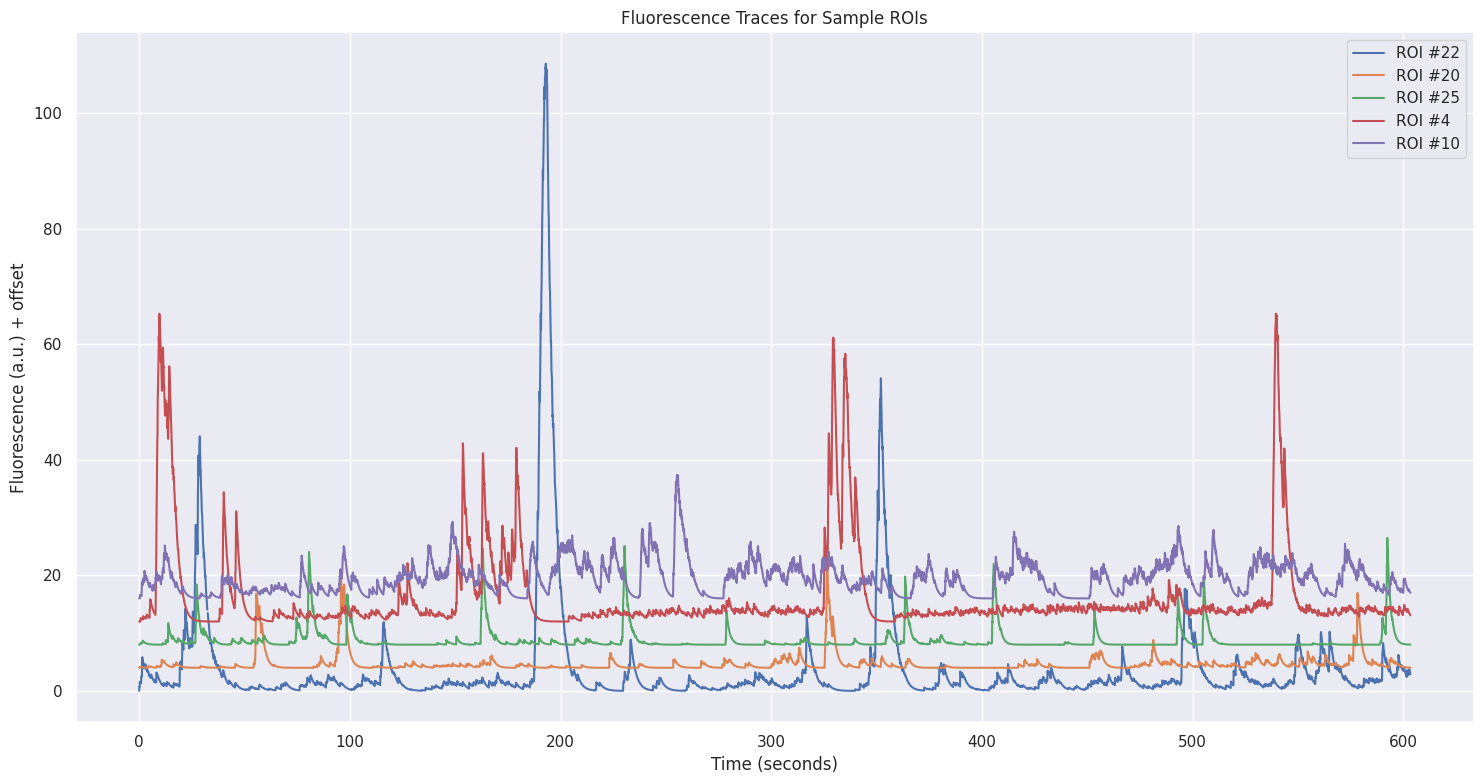

In [12]:
# Plot fluorescence traces for a subset of ROIs
n_sample_rois = 5  # Number of example ROIs to plot
np.random.seed(0)  # For reproducibility
sample_roi_indices = np.random.choice(n_rois, n_sample_rois, replace=False)

plt.figure(figsize=(15, 8))

# Plot each sample ROI's fluorescence trace
for i, roi_idx in enumerate(sample_roi_indices):
    # Get the fluorescence trace for this ROI
    # Convert h5py Dataset to numpy array for the specific ROI
    f_trace = roi_response_series.data[:, roi_idx].astype(np.float32)
    
    # Plot with offset for better visualization
    offset = i * 4  # Arbitrary offset to separate traces
    plt.plot(time, f_trace + offset, label=f'ROI #{roi_idx}')

plt.xlabel('Time (seconds)')
plt.ylabel('Fluorescence (a.u.) + offset')
plt.title('Fluorescence Traces for Sample ROIs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Calcium Transient Events

The dataset also includes information about detected calcium transient events. These represent probable neuronal firing events extracted from the raw calcium signals.

In [13]:
# Get event amplitude data
event_amplitude = nwb.processing["ophys"].data_interfaces["EventAmplitude"]

# Print basic information
print(f"Event amplitude data shape: {event_amplitude.data.shape} (timepoints, ROIs)")
print(f"Sampling rate: {event_amplitude.rate} Hz")
print(f"Unit: {event_amplitude.unit}")

Event amplitude data shape: (6041, 40) (timepoints, ROIs)
Sampling rate: 10.013668242678232 Hz
Unit: fluorescence


Let's visualize the event amplitudes for the same neurons we plotted above, alongside their fluorescence traces. This will help us understand the relationship between the raw fluorescence signal and detected events.

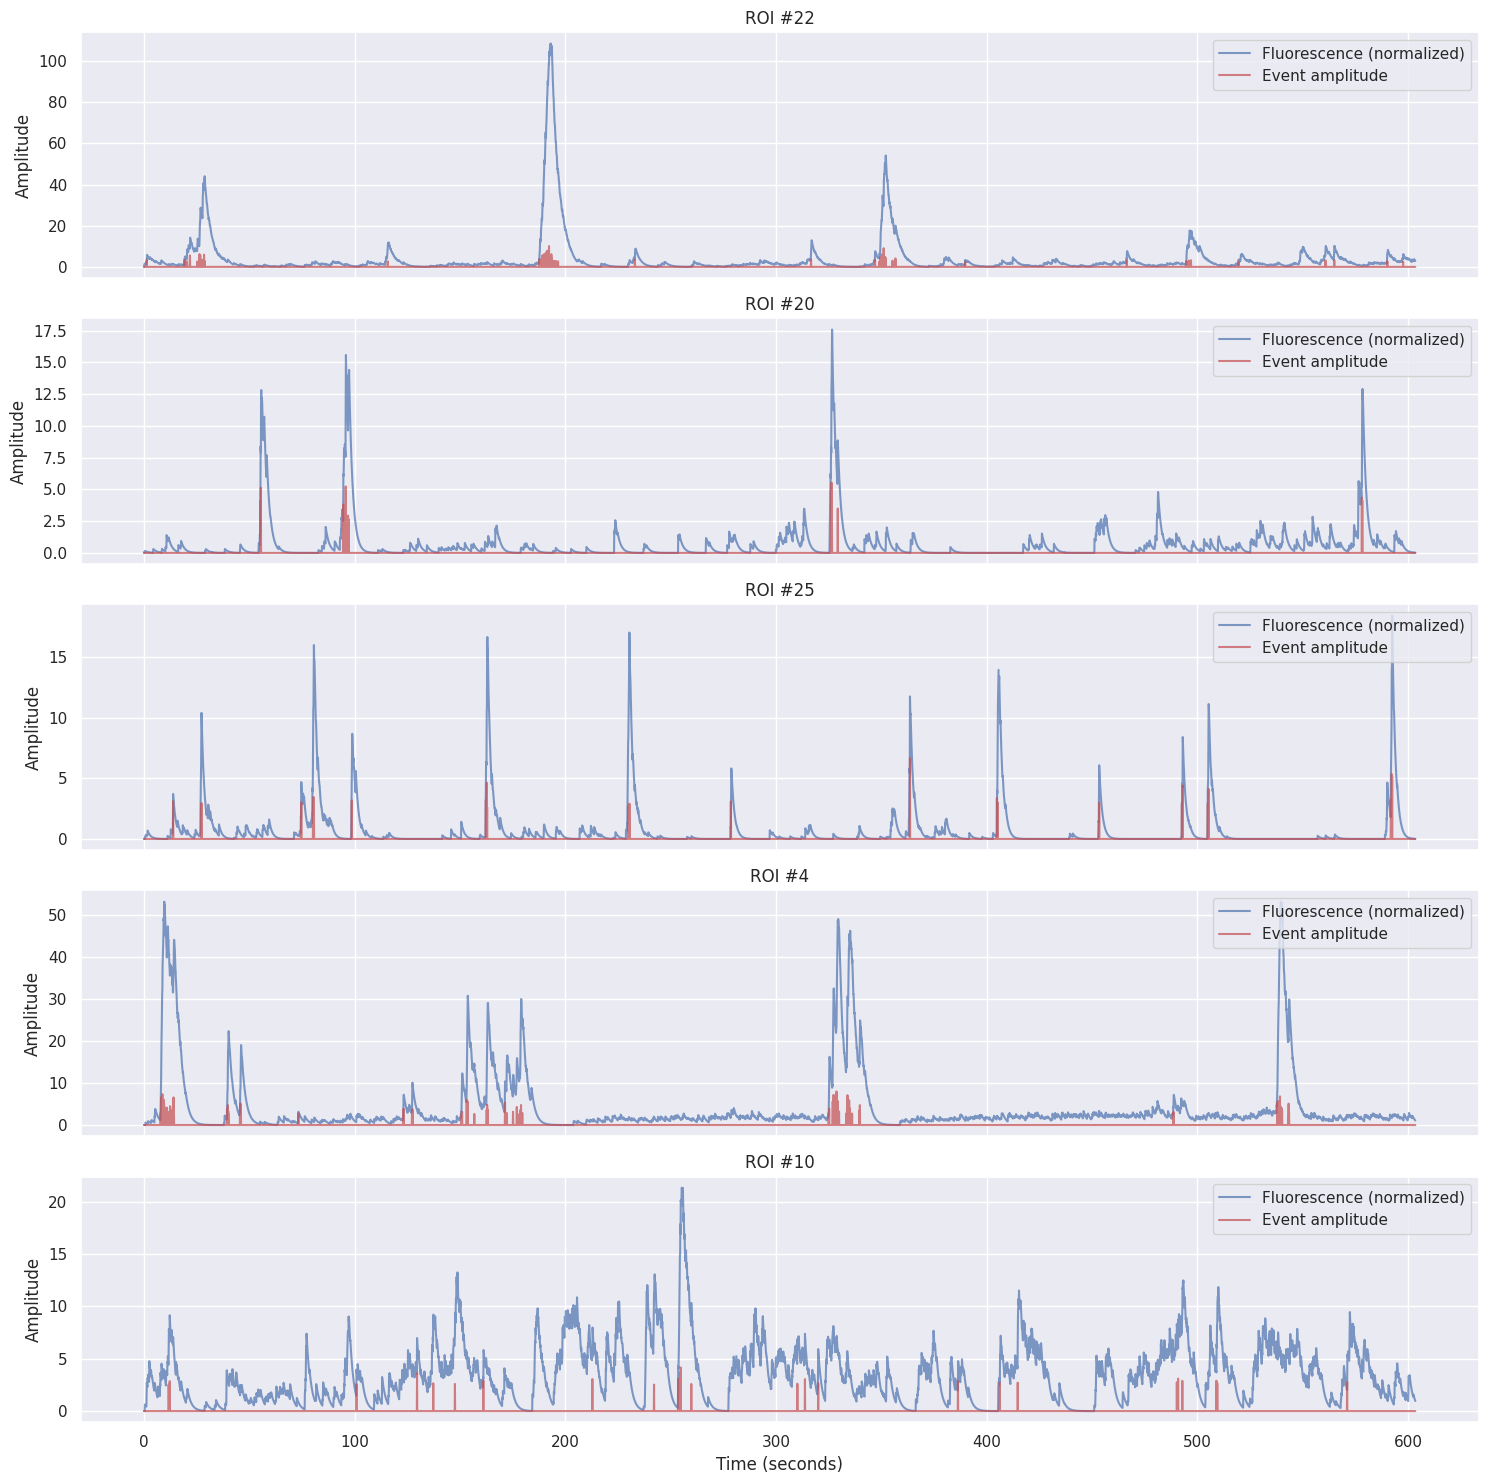

In [14]:
# Plot fluorescence traces and event amplitudes for the same sample ROIs
fig, axes = plt.subplots(n_sample_rois, 1, figsize=(15, 3*n_sample_rois), sharex=True)

# Pre-load the data for all ROIs to avoid repeated remote calls
f_traces_all = np.array([roi_response_series.data[:, idx].astype(np.float32) for idx in sample_roi_indices])
e_traces_all = np.array([event_amplitude.data[:, idx].astype(np.float32) for idx in sample_roi_indices])

for i, roi_idx in enumerate(sample_roi_indices):
    # Get the fluorescence trace and event amplitude for this ROI
    f_trace = f_traces_all[i]
    e_trace = e_traces_all[i]
    
    # Normalize for better comparison
    f_min, f_max = np.min(f_trace), np.max(f_trace)
    f_norm = (f_trace - f_min) / (f_max - f_min) if f_max > f_min else f_trace
    
    # Plot fluorescence trace
    axes[i].plot(time, f_norm, 'b-', alpha=0.7, label='Fluorescence (normalized)')
    
    # Plot event amplitude
    axes[i].plot(time, e_trace, 'r-', alpha=0.7, label='Event amplitude')
    
    axes[i].set_title(f'ROI #{roi_idx}')
    axes[i].set_ylabel('Amplitude')
    axes[i].legend(loc='upper right')
    axes[i].grid(True)

# Set common x label
axes[-1].set_xlabel('Time (seconds)')

plt.tight_layout()
plt.show()

Let's zoom in on a shorter time window to see the events more clearly.

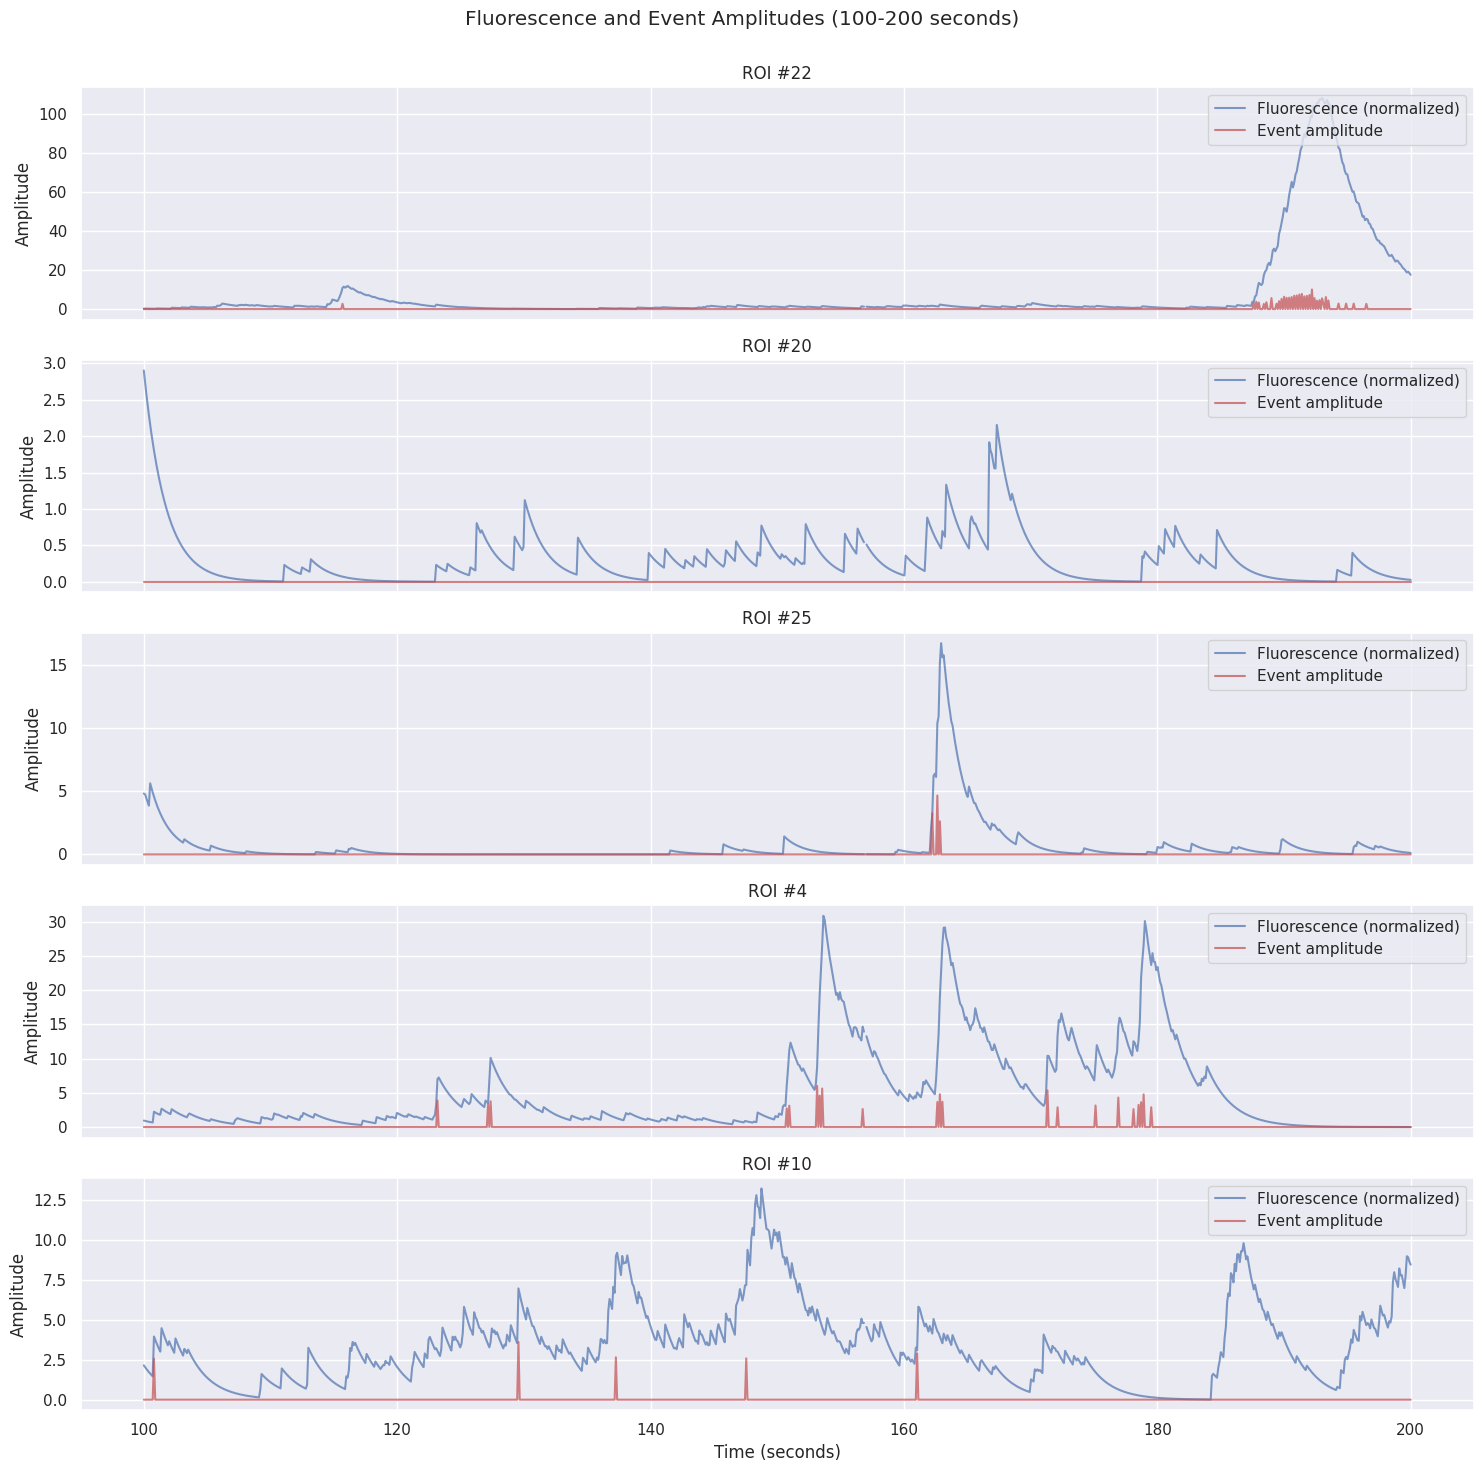

In [15]:
# Plot a zoomed-in view of fluorescence traces and event amplitudes
time_window = (100, 200)  # Show data between 100 and 200 seconds
time_mask = (time >= time_window[0]) & (time <= time_window[1])

fig, axes = plt.subplots(n_sample_rois, 1, figsize=(15, 3*n_sample_rois), sharex=True)

# Get time slice and indices
time_slice = time[time_mask]
time_indices = np.where(time_mask)[0]
start_idx, end_idx = time_indices[0], time_indices[-1]

for i, roi_idx in enumerate(sample_roi_indices):
    # Get the fluorescence trace and event amplitude for this ROI from the pre-loaded arrays
    f_trace = f_traces_all[i][start_idx:end_idx+1]
    e_trace = e_traces_all[i][start_idx:end_idx+1]
    
    # Normalize for better comparison
    f_min, f_max = np.min(f_trace), np.max(f_trace)
    f_norm = (f_trace - f_min) / (f_max - f_min) if f_max > f_min else f_trace
    
    # Plot fluorescence trace
    axes[i].plot(time_slice, f_norm, 'b-', alpha=0.7, label='Fluorescence (normalized)')
    
    # Plot event amplitude
    axes[i].plot(time_slice, e_trace, 'r-', alpha=0.7, label='Event amplitude')
    
    axes[i].set_title(f'ROI #{roi_idx}')
    axes[i].set_ylabel('Amplitude')
    axes[i].legend(loc='upper right')
    axes[i].grid(True)

# Set common x label
axes[-1].set_xlabel('Time (seconds)')

plt.suptitle(f'Fluorescence and Event Amplitudes ({time_window[0]}-{time_window[1]} seconds)')
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Neuronal Coactivation Analysis

One of the key aspects of this dataset is the study of neuronal coactivation patterns. Let's explore how different neurons' activities are correlated with each other.

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


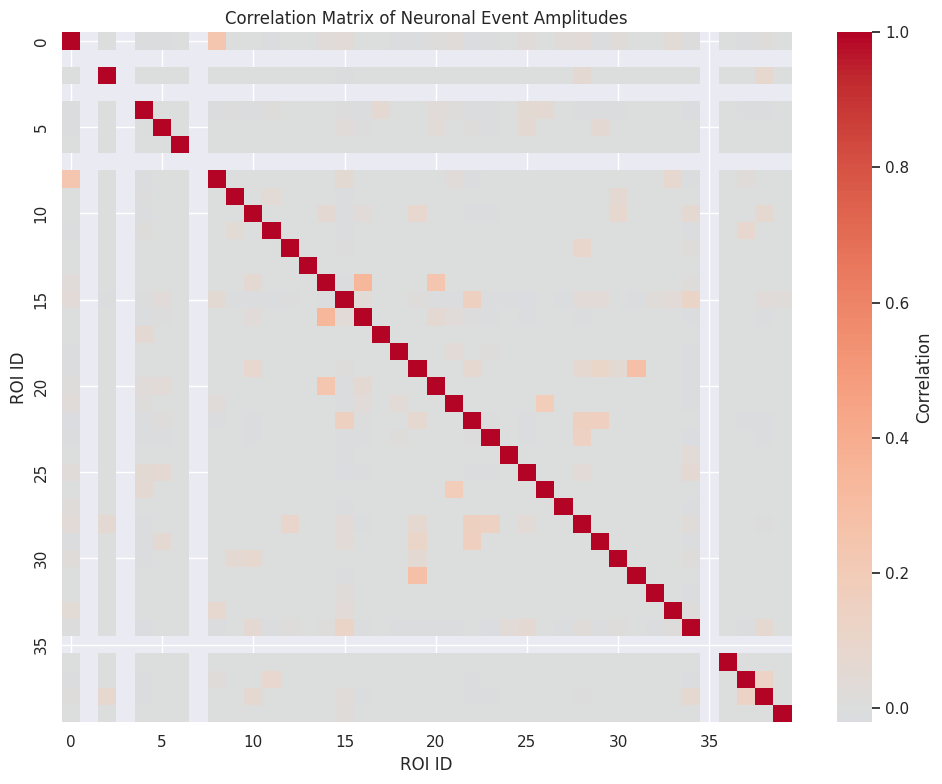

In [16]:
# Calculate correlation matrix for the event amplitudes
# Need to convert h5py Dataset to numpy array before transposing
event_data_np = event_amplitude.data[:]  # Load into memory as numpy array
event_corr = np.corrcoef(event_data_np.T)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(event_corr, cmap='coolwarm', center=0, 
            xticklabels=5, yticklabels=5,  # Show every 5th label for clarity
            cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix of Neuronal Event Amplitudes')
plt.xlabel('ROI ID')
plt.ylabel('ROI ID')
plt.tight_layout()
plt.show()

Let's identify pairs of neurons with high correlation and visualize their event amplitudes together.

Top correlated neuron pairs:
Pair 1: ROI #25 and ROI #35, correlation = nan
Pair 2: ROI #7 and ROI #27, correlation = nan
Pair 3: ROI #7 and ROI #28, correlation = nan


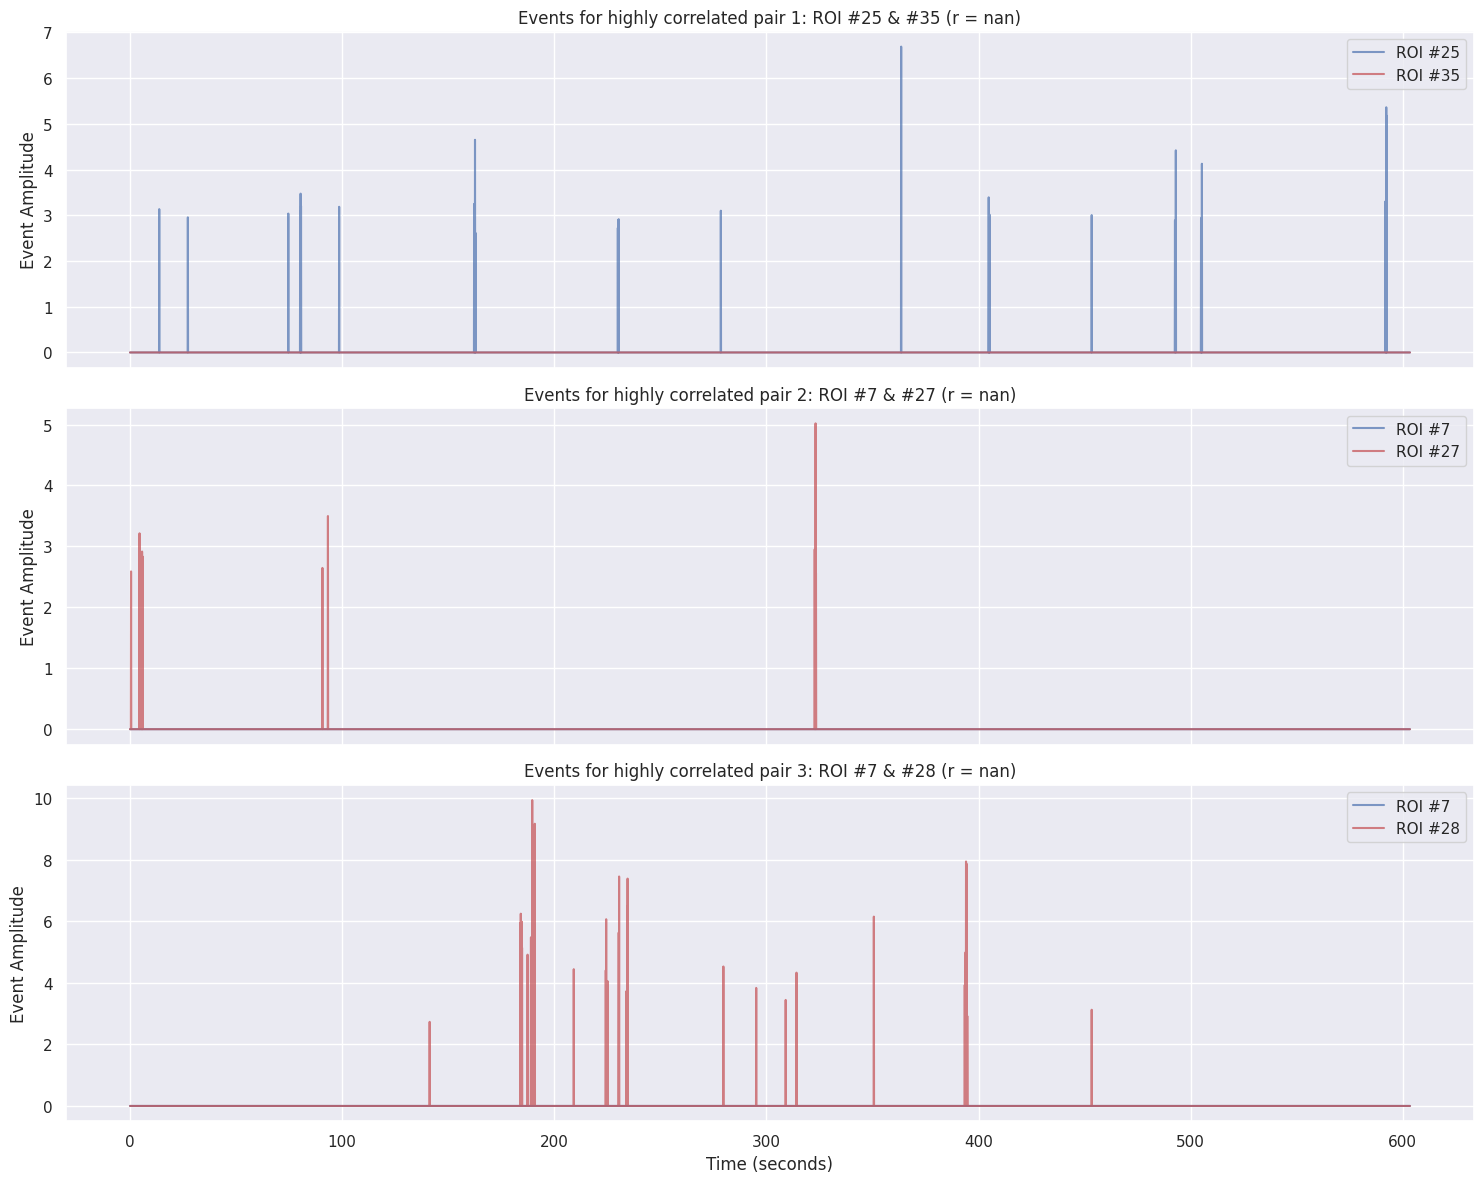

In [17]:
# Find highly correlated neuron pairs
# First, set the diagonal to zero to exclude self-correlations
corr_no_diag = event_corr.copy()
np.fill_diagonal(corr_no_diag, 0)

# Find the indices of the top 3 most correlated pairs
n_top_pairs = 3
flat_indices = np.argsort(corr_no_diag.flatten())[-n_top_pairs:]
top_pairs = np.array(np.unravel_index(flat_indices, corr_no_diag.shape)).T

# Print the correlation values for these pairs
print("Top correlated neuron pairs:")
for i, (roi1, roi2) in enumerate(top_pairs):
    corr_value = event_corr[roi1, roi2]
    print(f"Pair {i+1}: ROI #{roi1} and ROI #{roi2}, correlation = {corr_value:.3f}")

# Visualize the event amplitudes for these highly correlated pairs
fig, axes = plt.subplots(n_top_pairs, 1, figsize=(15, 4*n_top_pairs), sharex=True)

# Pre-load all the event data into memory
event_data_full = event_amplitude.data[:].astype(np.float32)

for i, (roi1, roi2) in enumerate(top_pairs):
    # Get event amplitudes for this pair from the pre-loaded array
    events1 = event_data_full[:, roi1]
    events2 = event_data_full[:, roi2]
    
    # Plot
    axes[i].plot(time, events1, 'b-', alpha=0.7, label=f'ROI #{roi1}')
    axes[i].plot(time, events2, 'r-', alpha=0.7, label=f'ROI #{roi2}')
    
    # Title and labels
    axes[i].set_title(f'Events for highly correlated pair {i+1}: ROI #{roi1} & #{roi2} (r = {event_corr[roi1, roi2]:.3f})')
    axes[i].set_ylabel('Event Amplitude')
    axes[i].legend(loc='upper right')
    axes[i].grid(True)

# Set common x label
axes[-1].set_xlabel('Time (seconds)')

plt.tight_layout()
plt.show()

## Advanced Visualization: Event Raster Plot

Let's create a raster plot to visualize activity events across all neurons. This will help us identify patterns of synchronized activity.

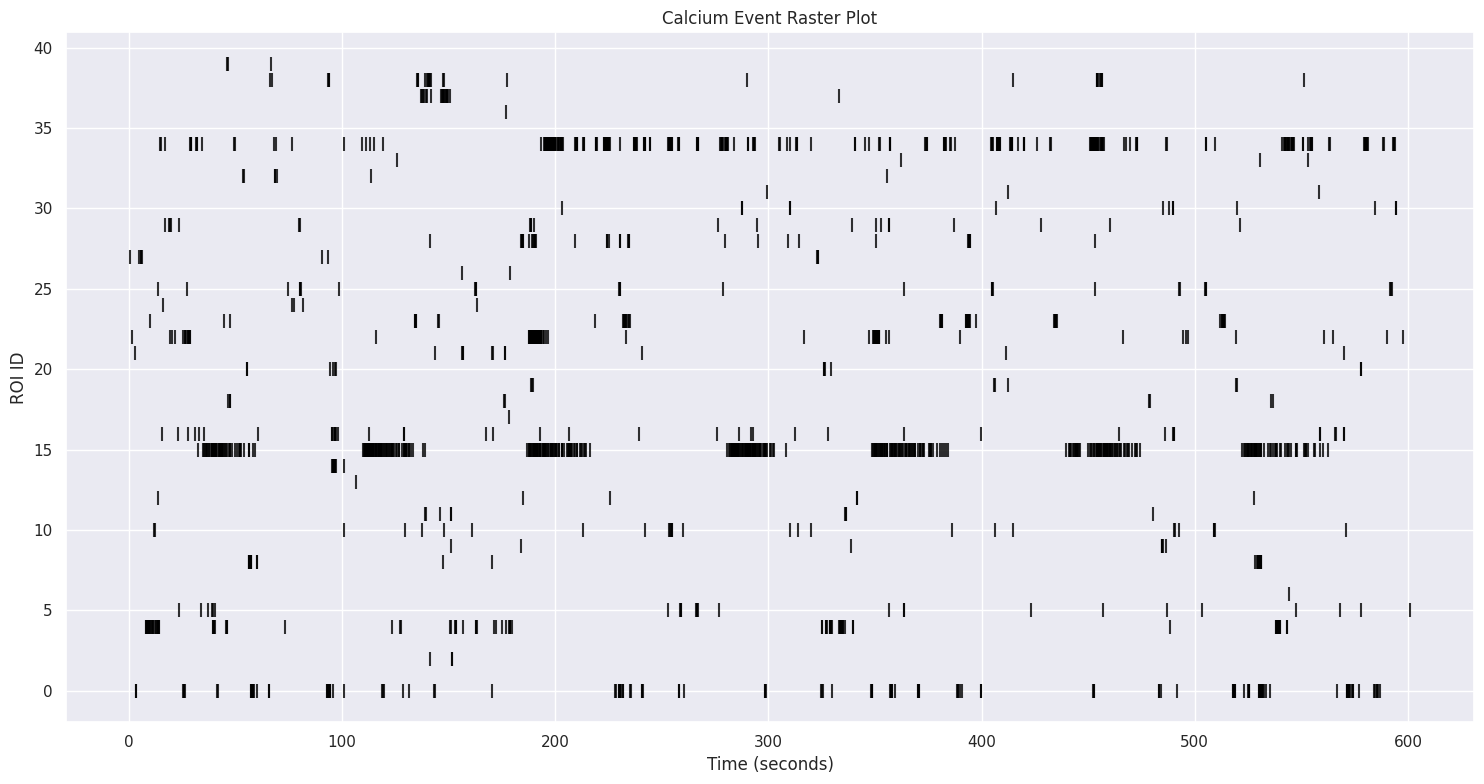

In [18]:
# Create a raster plot of calcium events
# First, binarize the event data using a threshold
threshold = 0.05  # Adjust based on the data distribution
event_binary = event_data_full > threshold

# Plot the raster
plt.figure(figsize=(15, 8))
for i in range(min(n_rois, 40)):  # Limit to 40 ROIs for visualization clarity
    # Find time points with events for this ROI
    event_times = time[event_binary[:, i]]
    # Create a scatter plot
    plt.scatter(event_times, np.ones_like(event_times) * i, 
              marker='|', s=100, c='black', alpha=0.8)

plt.xlabel('Time (seconds)')
plt.ylabel('ROI ID')
plt.title('Calcium Event Raster Plot')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

## Analyzing Temporal Patterns

Let's examine the temporal distribution of calcium events to identify patterns in neuronal activity over time.

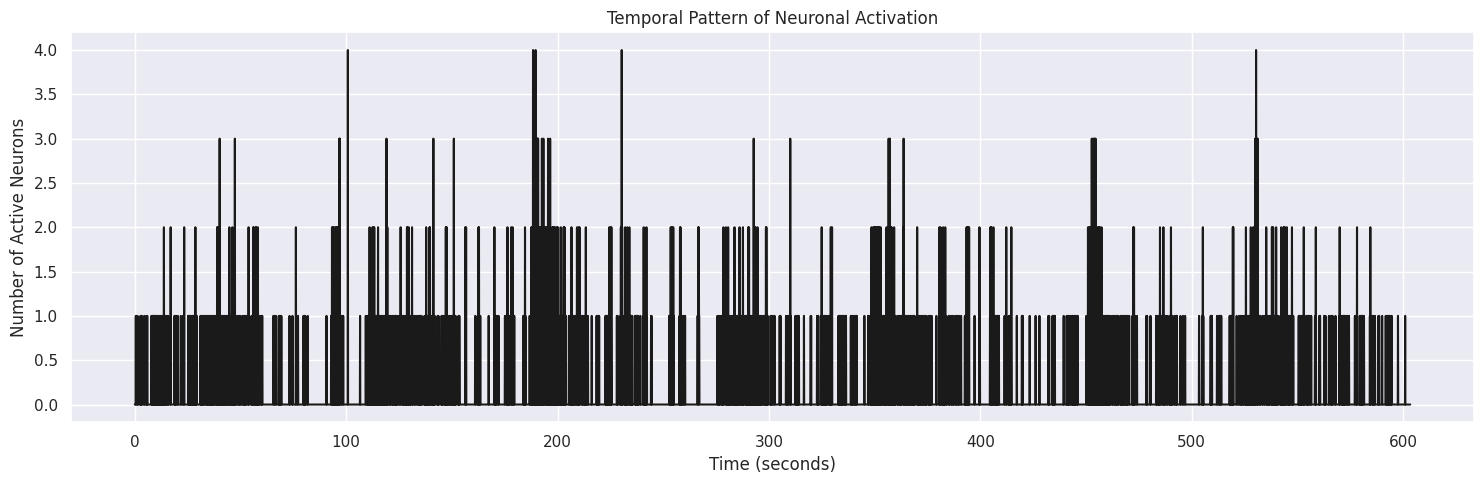

In [19]:
# Calculate the number of active neurons at each time point
active_counts = np.sum(event_binary, axis=1)

# Plot the time course of neuronal activation
plt.figure(figsize=(15, 5))
plt.plot(time, active_counts, 'k-')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of Active Neurons')
plt.title('Temporal Pattern of Neuronal Activation')
plt.grid(True)
plt.tight_layout()
plt.show()

Let's examine the distribution of event amplitudes to understand the variability in calcium responses.

Event amplitude statistics:
Mean amplitude: 3.9680
Median amplitude: 3.4988
Minimum amplitude: 2.4739
Maximum amplitude: 12.8546
Percentage of time points with events: 0.59%


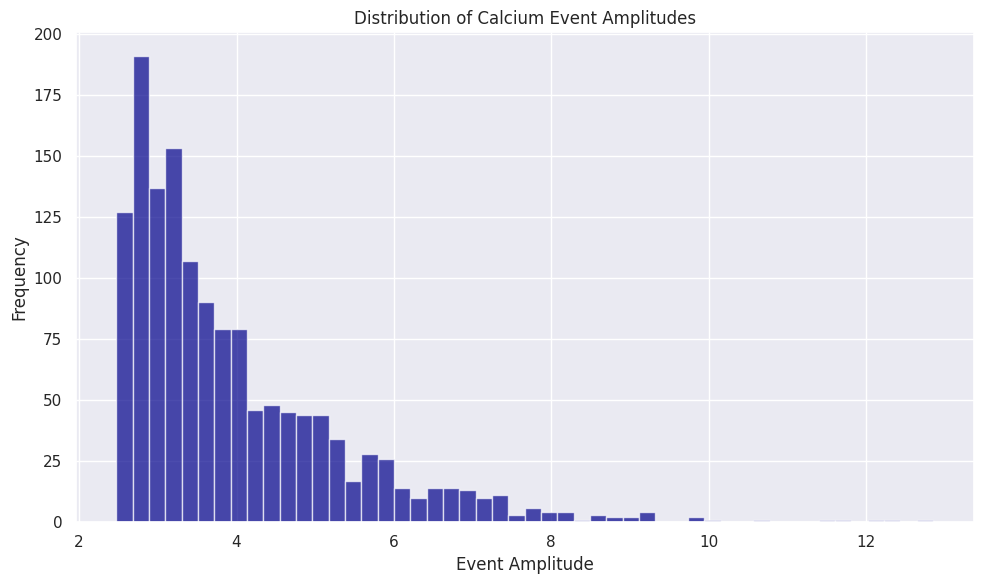

In [20]:
# Calculate some statistics on event amplitudes
all_events = event_data_full.flatten()
non_zero_events = all_events[all_events > 0]

print("Event amplitude statistics:")
print(f"Mean amplitude: {np.mean(non_zero_events):.4f}")
print(f"Median amplitude: {np.median(non_zero_events):.4f}")
print(f"Minimum amplitude: {np.min(non_zero_events):.4f}")
print(f"Maximum amplitude: {np.max(non_zero_events):.4f}")
print(f"Percentage of time points with events: {100 * len(non_zero_events) / len(all_events):.2f}%")

# Plot the distribution of event amplitudes
plt.figure(figsize=(10, 6))
plt.hist(non_zero_events, bins=50, alpha=0.7, color='darkblue')
plt.xlabel('Event Amplitude')
plt.ylabel('Frequency')
plt.title('Distribution of Calcium Event Amplitudes')
plt.grid(True)
plt.tight_layout()
plt.show()

## Spatial Analysis: ROI Locations and Activity Patterns

Let's overlay the ROI locations on a sample frame and color-code them based on their average activity.

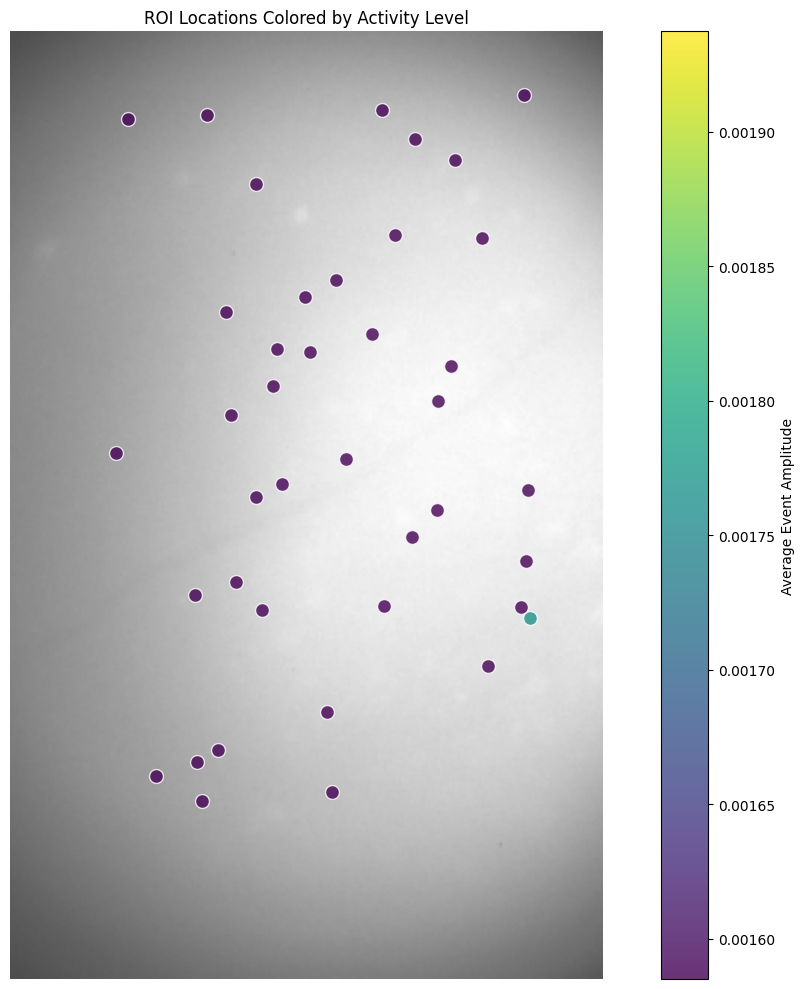

In [21]:
# Calculate average event amplitude for each ROI
roi_avg_activity = np.mean(event_data_full, axis=0)

# Create a visualization with ROIs colored by activity level
with plt.style.context('default'):
    plt.figure(figsize=(12, 10))
    
    # First show the sample frame
    plt.imshow(sample_frame, cmap='gray', alpha=0.7)
    
    # Convert the sparse ROI masks if necessary and add them to the plot
    for i in range(n_rois):
        # Get the mask and parse if needed
        mask = plane_seg.image_mask[i]
        if mask.ndim == 1:  # Sparse format
            # Reshape to Nx3 array
            mask_points = mask.reshape(-1, 3)
            
            # Extract coordinates and weights
            y_coords = mask_points[:, 1].astype(int)
            x_coords = mask_points[:, 0].astype(int)
            weights = mask_points[:, 2]
            
            # Calculate centroid
            centroid_x = np.sum(x_coords * weights) / np.sum(weights) if np.sum(weights) > 0 else np.mean(x_coords)
            centroid_y = np.sum(y_coords * weights) / np.sum(weights) if np.sum(weights) > 0 else np.mean(y_coords)
        else:
            # For dense masks, calculate centroid differently
            y_indices, x_indices = np.indices(mask.shape)
            centroid_y = np.sum(y_indices * mask) / np.sum(mask) if np.sum(mask) > 0 else mask.shape[0]/2
            centroid_x = np.sum(x_indices * mask) / np.sum(mask) if np.sum(mask) > 0 else mask.shape[1]/2
        
        # Color based on activity level
        activity = roi_avg_activity[i]
        
        # Plot a circle at the centroid, sized by overall activity and colored on a scale
        plt.scatter(centroid_x, centroid_y, s=100, c=[activity], cmap='viridis', 
                   edgecolor='white', linewidth=1, alpha=0.8)
    
    plt.colorbar(label='Average Event Amplitude')
    plt.title('ROI Locations Colored by Activity Level')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

## Linking to Neurosift for Further Exploration

You can explore this NWB file in more detail using Neurosift, an online viewer for neurophysiology data:

[View this file on Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/&dandisetId=001174&dandisetVersion=0.250331.2218)

## Summary and Conclusions

In this notebook, we explored calcium imaging data from the supplementary motor area (SMA) of a macaque monkey during spontaneous activity. We were able to:

1. **Access and load** neurophysiology data from the DANDI archive using the DANDI API and PyNWB

2. **Visualize raw imaging data** and identified regions of interest (ROIs) representing individual neurons

3. **Examine fluorescence traces** and detected calcium events, showing the temporal dynamics of neuronal activity

4. **Analyze correlations between neurons**, identifying highly correlated pairs that may be functionally connected

5. **Visualize spatio-temporal patterns** of neuronal activity in SMA during spontaneous conditions

This dataset offers valuable insights into neuronal activity patterns in the motor cortices of non-human primates. The calcium imaging approach allows for monitoring many neurons simultaneously, which is crucial for understanding how neural populations coordinate their activity during both spontaneous conditions and motor tasks.

## Directions for Further Analysis

Building on this exploratory analysis, future research directions might include:

1. **Comparing neuronal activity patterns across different behavioral conditions** (resting vs. reaching)

2. **Identifying cell assemblies** or functional clusters of neurons using dimensionality reduction techniques

3. **Analyzing the temporal dynamics** of neuronal coactivation patterns to detect sequences of activity

4. **Comparing activity patterns between SMA and M1** to understand the different roles these areas play in motor control

5. **Correlating neuronal activation with specific behavioral events** using the task-related data available in the dataset

The rich data contained in DANDI:001174 provides an excellent foundation for these and many other analyses to better understand the neural basis of motor control in primates.